In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot
import warnings
from math import sqrt
warnings.simplefilter(action="ignore", category=FutureWarning)

                 cpi
time                
2017-12-01  101.3522
2018-01-01  101.4218
2018-02-01  103.2000
2018-03-01  101.7085
2018-04-01  101.0774


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3112\2241759688.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = pd.read_excel(r'C:\Users\Administrator\Desktop\test\anhuicpi.xlsx', header=0, parse_dates=[0], index_col=0)


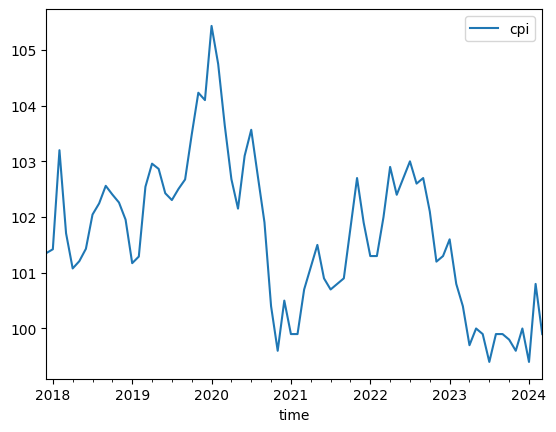

In [2]:
series = pd.read_excel(r'C:\Users\Administrator\Desktop\test\anhuicpi.xlsx', header=0, parse_dates=[0], index_col=0)
print(series.head())
series.plot()
pyplot.show()

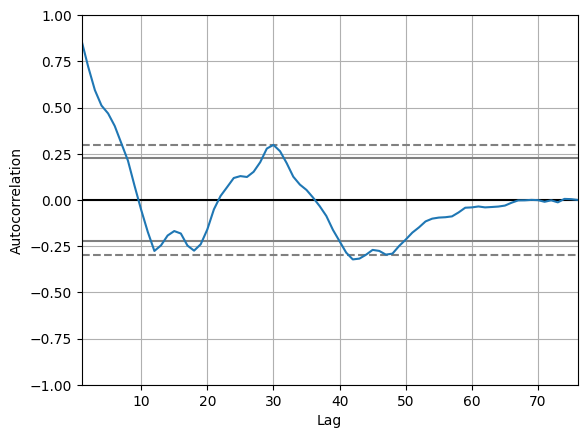

In [3]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

                               SARIMAX Results                                
Dep. Variable:                    cpi   No. Observations:                   76
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 -75.235
Date:                Thu, 16 May 2024   AIC                            160.470
Time:                        09:12:14   BIC                            172.124
Sample:                    12-01-2017   HQIC                           165.128
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.5289      0.619    164.063      0.000     100.316     102.742
ar.L1          0.9858      0.111      8.849      0.000       0.767       1.204
ar.L2         -0.1839      0.194     -0.949      0.3

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3112\917925455.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = pd.read_excel(r'C:\Users\Administrator\Desktop\test\anhuicpi.xlsx', header=0, parse_dates=[0], index_col=0)
C:\software\Anaconda3\envs\ARIMA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\software\Anaconda3\envs\ARIMA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\software\Anaconda3\envs\ARIMA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_d

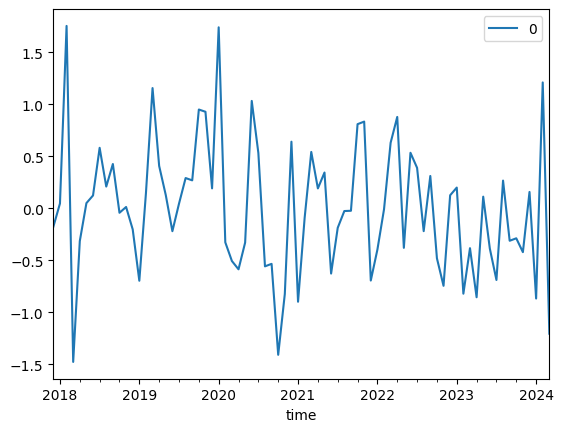

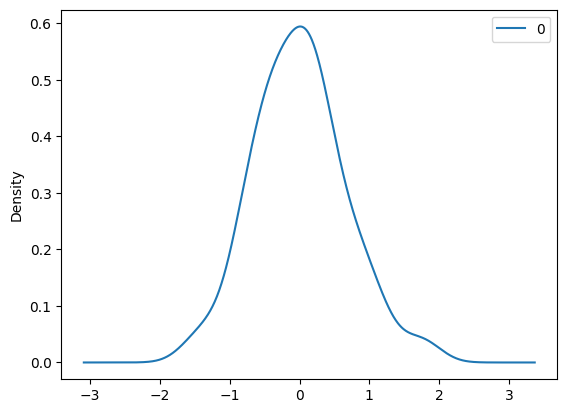

               0
count  76.000000
mean    0.000317
std     0.649551
min    -1.476319
25%    -0.402599
50%     0.002094
75%     0.356025
max     1.754311


In [4]:
import statsmodels.api as sm
series = pd.read_excel(r'C:\Users\Administrator\Desktop\test\anhuicpi.xlsx', header=0, parse_dates=[0], index_col=0)
# fit model
model = sm.tsa.ARIMA(series, order=(3, 0, 0), freq = None).fit()
print(model.summary())
# plot residual errors
residuals = pd.DataFrame(model.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [5]:
from sklearn.metrics import mean_squared_error

predicted=101.195733, expected=101.300000
predicted=101.572524, expected=101.600000
predicted=101.756976, expected=100.800000
predicted=100.799807, expected=100.400000
predicted=100.692901, expected=99.700000
predicted=99.950331, expected=100.000000
predicted=100.487726, expected=99.900000
predicted=100.169708, expected=99.400000
predicted=99.641247, expected=99.900000
predicted=100.364045, expected=99.900000
predicted=100.108659, expected=99.800000
predicted=100.038830, expected=99.600000
predicted=99.834845, expected=100.000000
predicted=100.332765, expected=99.400000
predicted=99.486177, expected=100.800000
predicted=101.237089, expected=99.900000
Test RMSE: 0.707


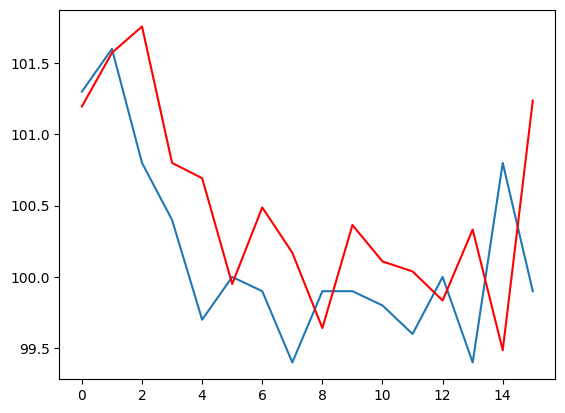

In [6]:
x = series.values
size = int(len(x) * 0.8)
train, test = x[0:size], x[size:len(x)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sm.tsa.ARIMA(history, order=(3, 0, 0), freq = None).fit()
    output = model.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()